# 3 Period Korean Analysis

## 1. Moduel Import
## 2. Data Load
## 3. Preprocess
> #### 3-1) Data Cleaning ; 특수 문자 등 제거
> #### 3-2) Tagging ; kkma를 이용하여 형태소 분석
> #### 3-3) Remove Stopword ; 불용어 제거
> #### 3-4) Tokenize ; LDA Modeling에 사용할 수 있도록 Token화, (noun만 추출)
## 4. Analysis
> #### 4-1) Tag 별 분포와 비율
> #### 4-2) Topic Modeling (LDA)
> #### 4-3) WordCloud
> #### ~~4-4) Network web analysis~~

## 1. Module Import

In [1]:
# self defined moduels
from myModules.cleaning import cleaning
from myModules.tagging import kkmaTagging
from myModules.stopword import removeStopWord
from myModules.tokenizing import tokenizing
from myModules.analysisTags import merge, calcTags, DataNLabel, showCountNRate, tag2csv, plotBar, plotFrequencyBar
from myModules.ldaModeling import buildDTM, topicWords, visualizeLDA
from myModules.plotWordCloud import plotWordCloud


# General Module
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Read File
import glob

# NLP
## tweepy version prob => install tweepy with version 3.9.0 
from gensim import models
from apyori import apriori


# Visualization
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Load

In [2]:
DATA_ROOT = './Data/3구간/'

PERIOD_1 = DATA_ROOT + '1시기/1시기_TT/'
PERIOD_2 = DATA_ROOT + '2시기/2시기_TT/'
PERIOD_3 = DATA_ROOT + '3시기/3시기_TT/'

RESULT_ROOT = './Result/3구간/'

RESULT_1 = RESULT_ROOT + '/1시기/'
RESULT_2 = RESULT_ROOT + '/2시기/'
RESULT_3 = RESULT_ROOT + '/3시기/'


In [3]:
files_1 = glob.glob(PERIOD_1+'*.txt')
files_2 = glob.glob(PERIOD_2+'*.txt')
files_3 = glob.glob(PERIOD_3+'*.txt')

texts_1 = []
texts_2 = []
texts_3 = []

for i in range(len(files_1)):
    f = open(files_1[i], 'r')
    text = f.read()
    texts_1.append(text)
    f.close

for i in range(len(files_2)):
    f = open(files_2[i], 'r')
    text = f.read()
    texts_2.append(text)
    f.close

for i in range(len(files_3)):
    f = open(files_3[i], 'r')
    text = f.read()
    texts_3.append(text)
    f.close

## 3. Preprocess

### 3-1. Data Cleaning

In [4]:
cleaned_1 = cleaning(texts_1)
cleaned_2 = cleaning(texts_2)
cleaned_3 = cleaning(texts_3)

### 3-2. Taggging

In [5]:
# kkma = Kkma()

In [6]:
# def kkmaTagging(texts):
#     tagged = []
#     for text in tqdm(texts):
#         tagged.append(kkma.pos(text))
#     return tagged

#### Period 1

In [7]:
tagged_1 = kkmaTagging(cleaned_1)

  0%|          | 0/10 [00:00<?, ?it/s]

#### Period 2

In [8]:
tagged_2 = kkmaTagging(cleaned_2)

  0%|          | 0/10 [00:00<?, ?it/s]

#### Period 3

In [9]:
tagged_3 = kkmaTagging(cleaned_3)

  0%|          | 0/11 [00:00<?, ?it/s]

### 3-3. Remove Stopword

#### Tag List 정의

In [10]:
tagList = [['noun', ['NN','NNS','NNP','NNPS'], ['NNG','NNB','NNP','NNM']], \
    ['pronoun', ['PRP','WP','PRP'], ['NP']],
    ['verb', ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], ['VV', 'VXV', 'VCP']],
    ['adjective', ['JJ', 'JJR', 'JJS'], ['VA', 'VXA', 'VCN']],
    ['adverb', ['RB', 'RBR', 'RBS', 'WRB', 'EX', 'RP'], ['MAG']],
    ['prep&conj', ['TO', 'IN', 'CC'], ['MAC']],
    ['determiner', ['DT', 'PDT', 'WDT'], ['MDT', 'MDN']],
    ['interjection',['UH'], ['IC']],
    ['number', ['CD'], ['NR', 'ON']],
    ['foreignW', ['FW'],['OL']],
    ['modal',['MD'],[]],
    ['josa', [], ['JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX']],
    ['possesiveS', ['POS'], []],
    ['others',['LS'], ['EPH', 'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD', 'XPN', 'XPV', 'XSN', 'XSV', 'XSA', 'XR', 'UN', 'OH']]]

tagList = pd.DataFrame(tagList)
tagList.columns = ['POS', 'Eng_tag', 'Kor_tag']

#### Stopword 정의

Stopword는 다음과 같이 설정하였습니다.
- 감탄사 : 'IC'
- 조사 : 'JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX'
- 어미 : 'EPH', 'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD'
- 접두사 : 'XPN', 'XPV'
- 접미사 : 'XSN', 'XSV', 'XSA'
- 어근 : 'XR'
- 명사추정범주 : 'UN'
- 한자 : 'OH'
- 외국어 : 'OL'
- 숫자 : 'ON'
- [https://www.ranks.nl/stopwords/korean](https://www.ranks.nl/stopwords/korean) 에 나타나 있는 보편적인 한국어 불용어

In [11]:
stop_tag_list = ['IC', 'JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX', 'EPH', \
    'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD',
    'XSN', 'XSV', 'XSA', 'UN', 'OH', 'OL', 'ON', 'XPN', 'XPV', 'XR']

In [12]:
Kor_stopwords = ''

with open("./Data/Kor_stopwords.txt", 'r', encoding='utf-8') as f:
    stopword = f.read()
    Kor_stopwords = stopword

Kor_stopwords = Kor_stopwords.split('\n')

#### Stopword 제거

In [13]:
wo_stopword_1 = removeStopWord(tagged_1, stop_tag_list, Kor_stopwords)
wo_stopword_2 = removeStopWord(tagged_2, stop_tag_list, Kor_stopwords)
wo_stopword_3 = removeStopWord(tagged_3, stop_tag_list, Kor_stopwords)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

### 3-4. Tokenize (noun)

- 정의한 tokenizing 함수 => 'noun', 'verb', 'adjective' 3가지 tokenize 모드 존재

In [14]:
tokenized_1 = tokenizing(wo_stopword_1, tagList, 'noun')
tokenized_2 = tokenizing(wo_stopword_2, tagList, 'noun')
tokenized_3 = tokenizing(wo_stopword_3, tagList, 'noun')

## 4. Analysis

### 4-1. Tag별 분포와 비율

#### Merge articles during Period

In [15]:
tagged_1 = merge(tagged_1)
tagged_2 = merge(tagged_2)
tagged_3 = merge(tagged_3)

wo_stopword_1 = merge(wo_stopword_1)
wo_stopword_2 = merge(wo_stopword_2)
wo_stopword_3 = merge(wo_stopword_3)

#### Period 1

In [16]:
countDict_1, classDict_1 = calcTags(tagged_1, tagList)
wo_countDict_1, wo_classDict_1 = calcTags(wo_stopword_1, tagList)

  0%|          | 0/94094 [00:00<?, ?it/s]

  0%|          | 0/28940 [00:00<?, ?it/s]

In [17]:
showCountNRate(countDict_1, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 94094개
[noun] 토큰 수 : 30894개 | 비율 : 32.83%
[pronoun] 토큰 수 : 2286개 | 비율 : 2.43%
[verb] 토큰 수 : 10419개 | 비율 : 11.07%
[adjective] 토큰 수 : 1596개 | 비율 : 1.7%
[adverb] 토큰 수 : 3110개 | 비율 : 3.31%
[prepnconj] 토큰 수 : 237개 | 비율 : 0.25%
[determiner] 토큰 수 : 1522개 | 비율 : 1.62%
[interjection] 토큰 수 : 5개 | 비율 : 0.01%
[number] 토큰 수 : 232개 | 비율 : 0.25%
[foreignW] 토큰 수 : 87개 | 비율 : 0.09%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 18744개 | 비율 : 19.92%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 24812개 | 비율 : 26.37%
-------------------------


In [18]:
showCountNRate(wo_countDict_1, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 28940개
[noun] 토큰 수 : 23104개 | 비율 : 79.83%
[pronoun] 토큰 수 : 207개 | 비율 : 0.72%
[verb] 토큰 수 : 3258개 | 비율 : 11.26%
[adjective] 토큰 수 : 571개 | 비율 : 1.97%
[adverb] 토큰 수 : 1462개 | 비율 : 5.05%
[prepnconj] 토큰 수 : 0개 | 비율 : 0.0%
[determiner] 토큰 수 : 151개 | 비율 : 0.52%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 84개 | 비율 : 0.29%
[foreignW] 토큰 수 : 0개 | 비율 : 0.0%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [19]:
tag2csv(countDict_1, classDict_1, tagList, RESULT_1 + "tag-withstopword")
tag2csv(wo_countDict_1, wo_classDict_1, tagList, RESULT_1 + "tag-withoutstopword")

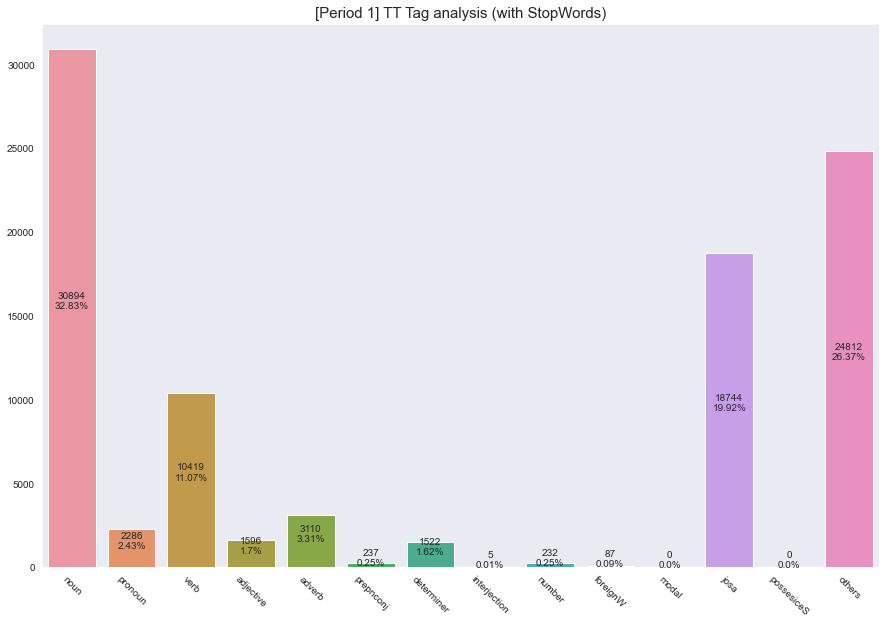

In [20]:
data, labels = DataNLabel(countDict_1)

plotBar(data, labels, "[Period 1] TT Tag analysis (with StopWords)", RESULT_1)

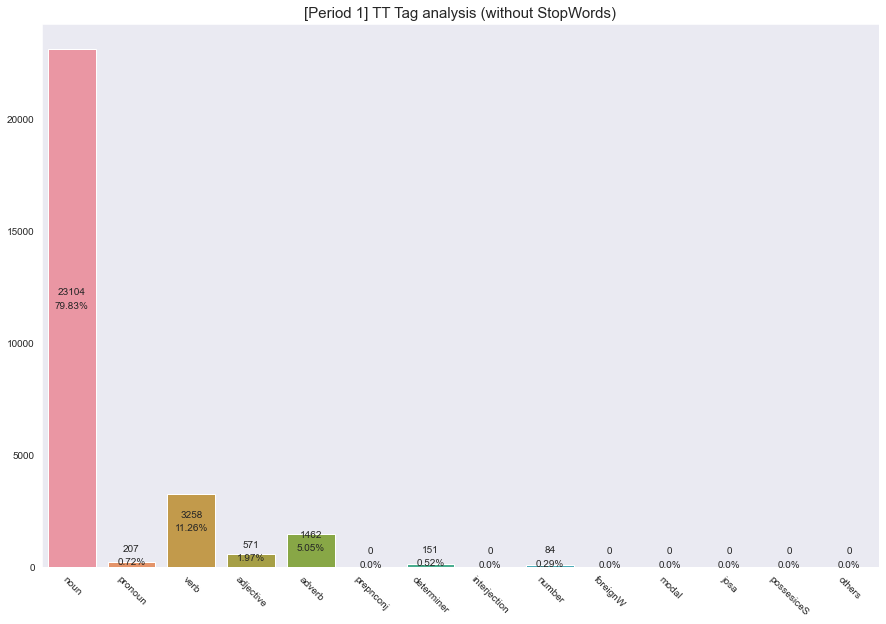

In [21]:
data, labels = DataNLabel(wo_countDict_1)

plotBar(data, labels, "[Period 1] TT Tag analysis (without StopWords)", RESULT_1)

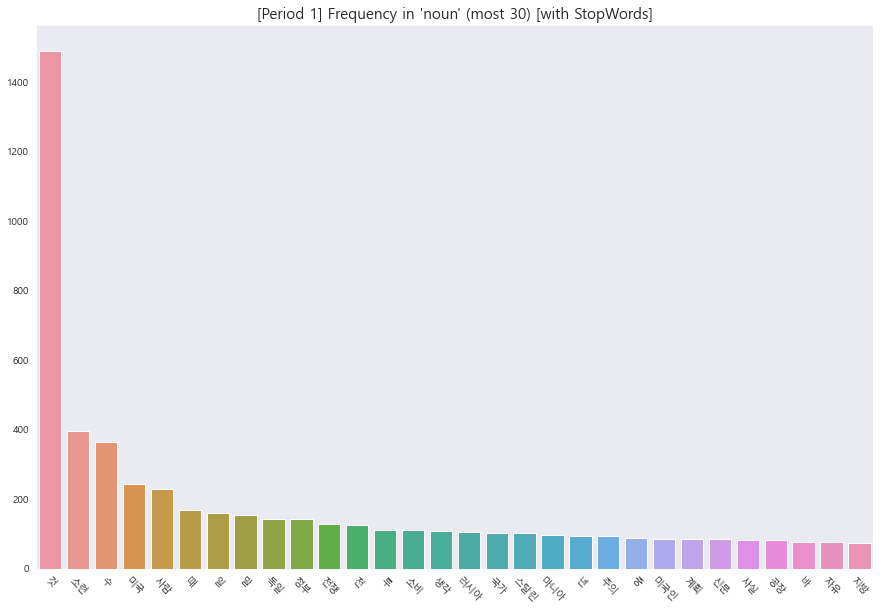

In [22]:
plotFrequencyBar(classDict_1, filepath=RESULT_1, pos='noun', wo=False, period=1)

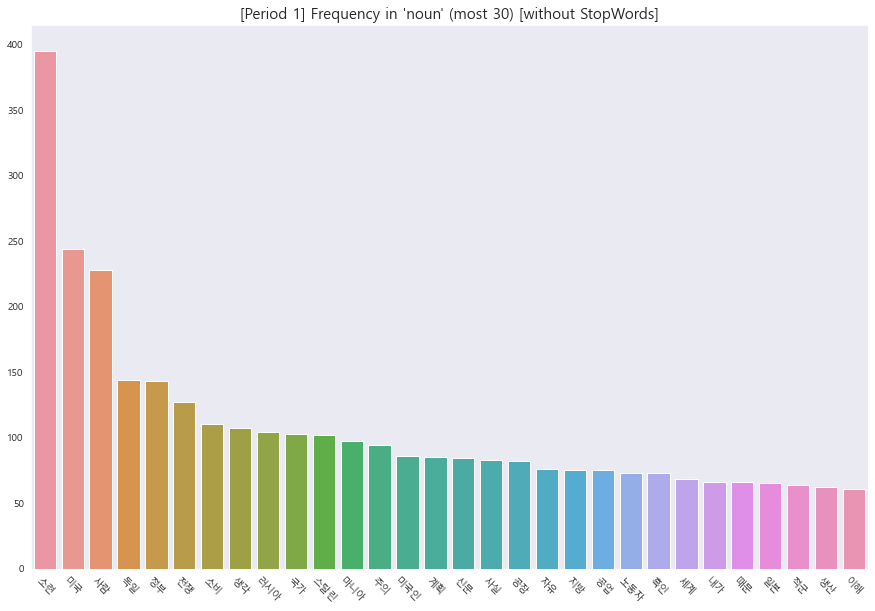

In [23]:
plotFrequencyBar(wo_classDict_1, filepath=RESULT_1, pos='noun', wo=True, period=1)

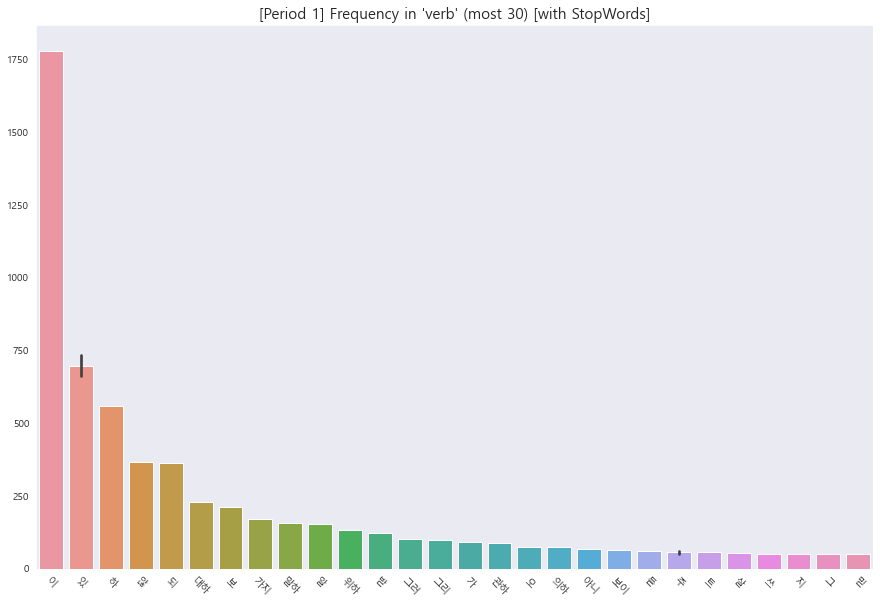

In [24]:
plotFrequencyBar(classDict_1, filepath=RESULT_1, pos='verb', wo=False, period=1)

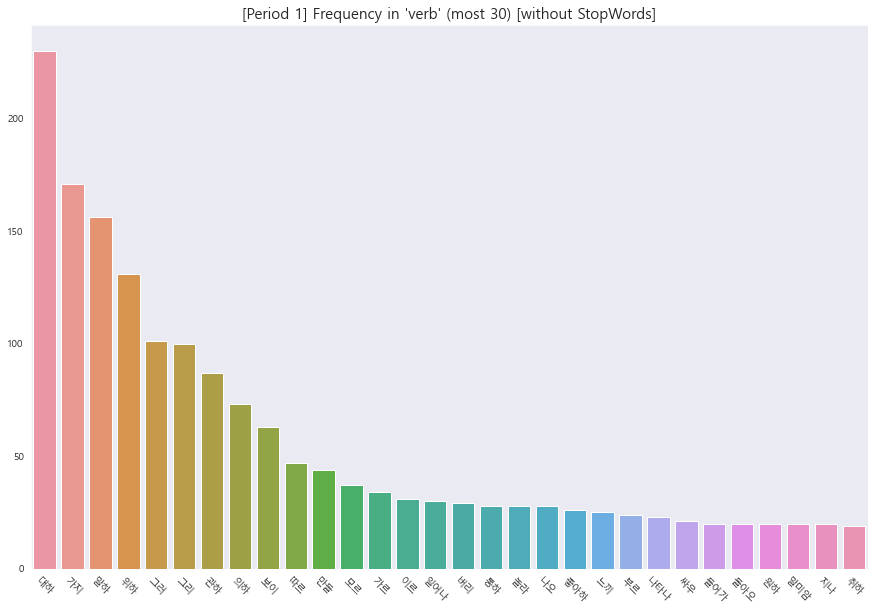

In [25]:
plotFrequencyBar(wo_classDict_1, filepath=RESULT_1, pos='verb', wo=True, period=1)

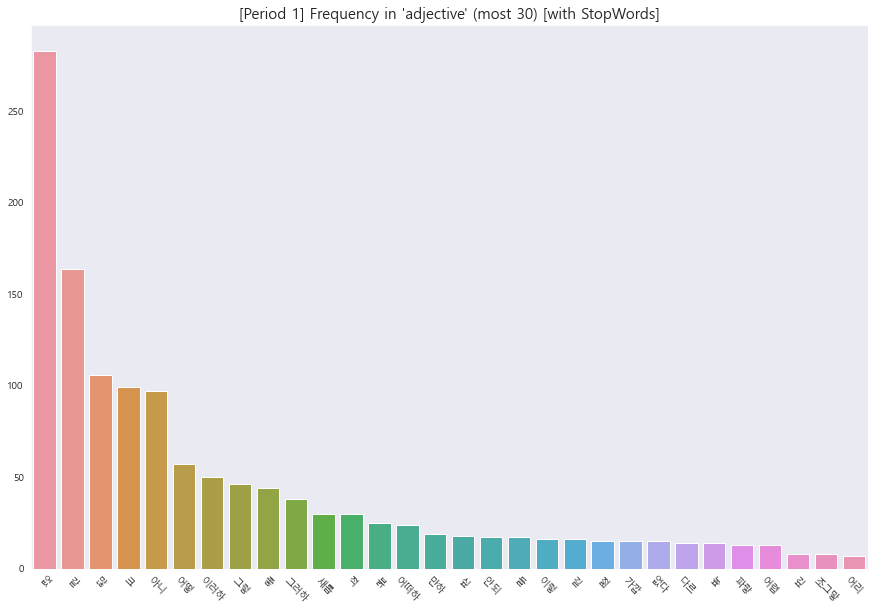

In [26]:
plotFrequencyBar(classDict_1, filepath=RESULT_1, pos='adjective', wo=False, period=1)

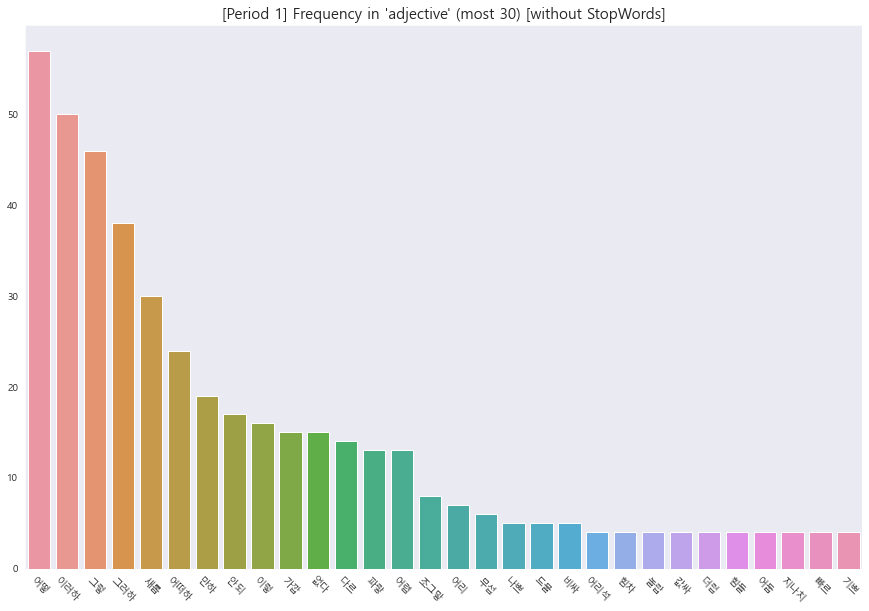

In [27]:
plotFrequencyBar(wo_classDict_1, filepath=RESULT_1, pos='adjective', wo=True, period=1)

#### Period 2

In [28]:
countDict_2, classDict_2 = calcTags(tagged_2, tagList)
wo_countDict_2, wo_classDict_2 = calcTags(wo_stopword_2, tagList)

  0%|          | 0/38067 [00:00<?, ?it/s]

  0%|          | 0/12503 [00:00<?, ?it/s]

In [29]:
showCountNRate(countDict_2, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 38067개
[noun] 토큰 수 : 13543개 | 비율 : 35.58%
[pronoun] 토큰 수 : 634개 | 비율 : 1.67%
[verb] 토큰 수 : 3775개 | 비율 : 9.92%
[adjective] 토큰 수 : 512개 | 비율 : 1.34%
[adverb] 토큰 수 : 1070개 | 비율 : 2.81%
[prepnconj] 토큰 수 : 121개 | 비율 : 0.32%
[determiner] 토큰 수 : 520개 | 비율 : 1.37%
[interjection] 토큰 수 : 4개 | 비율 : 0.01%
[number] 토큰 수 : 157개 | 비율 : 0.41%
[foreignW] 토큰 수 : 152개 | 비율 : 0.4%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 7579개 | 비율 : 19.91%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 9942개 | 비율 : 26.12%
-------------------------


In [30]:
showCountNRate(wo_countDict_2, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 12503개
[noun] 토큰 수 : 10507개 | 비율 : 84.04%
[pronoun] 토큰 수 : 99개 | 비율 : 0.79%
[verb] 토큰 수 : 1018개 | 비율 : 8.14%
[adjective] 토큰 수 : 188개 | 비율 : 1.5%
[adverb] 토큰 수 : 534개 | 비율 : 4.27%
[prepnconj] 토큰 수 : 0개 | 비율 : 0.0%
[determiner] 토큰 수 : 73개 | 비율 : 0.58%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 49개 | 비율 : 0.39%
[foreignW] 토큰 수 : 0개 | 비율 : 0.0%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [31]:
tag2csv(countDict_2, classDict_2, tagList, RESULT_2 + "tag-withstopword")
tag2csv(wo_countDict_2, wo_classDict_2, tagList, RESULT_2 + "tag-withoutstopword")

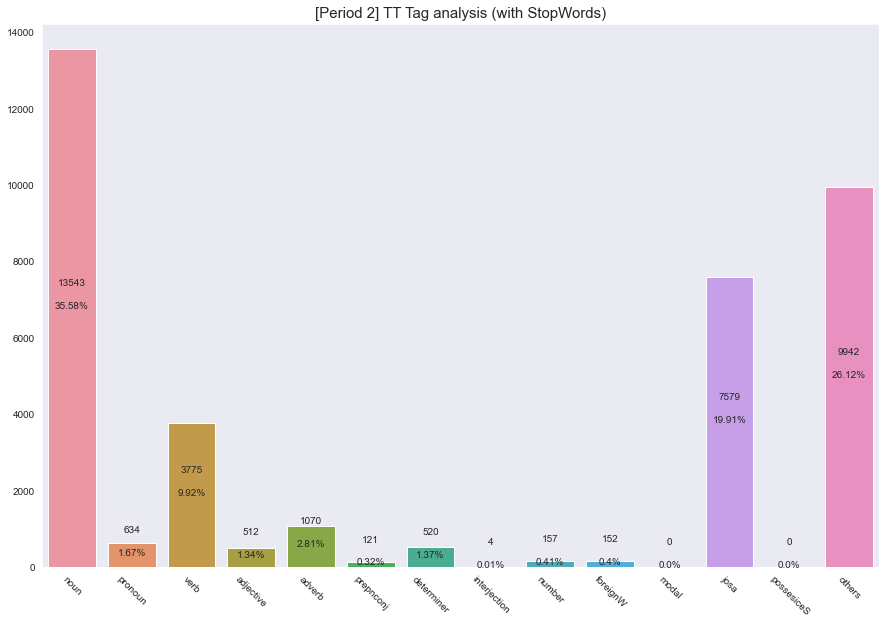

In [32]:
data, labels = DataNLabel(countDict_2)

plotBar(data, labels, "[Period 2] TT Tag analysis (with StopWords)", RESULT_2)

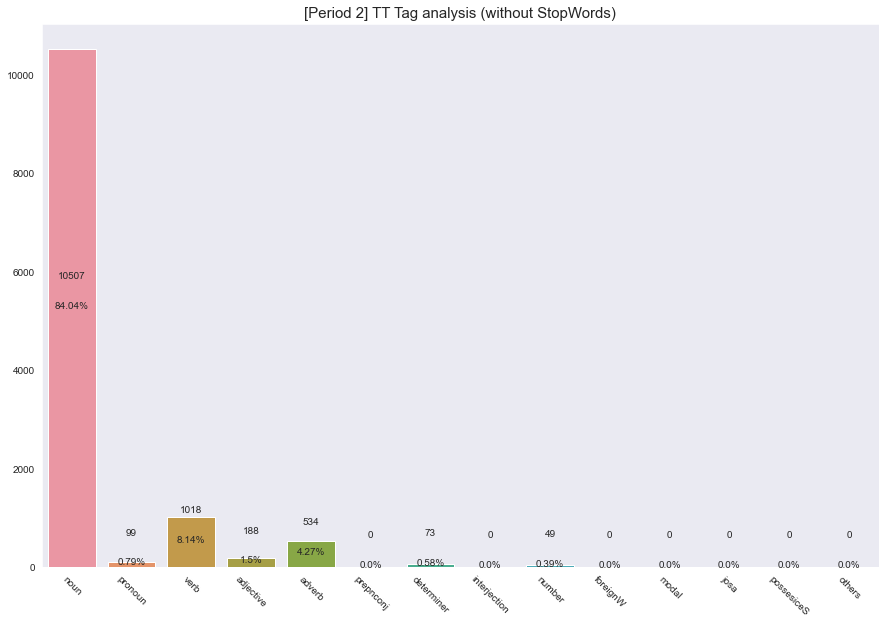

In [33]:
data, labels = DataNLabel(wo_countDict_2)

plotBar(data, labels, "[Period 2] TT Tag analysis (without StopWords)", RESULT_2)

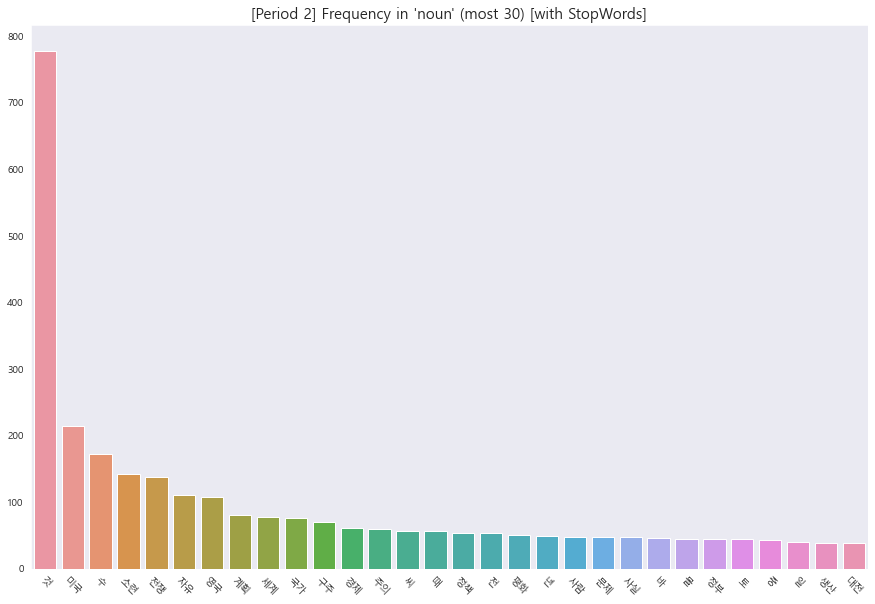

In [34]:
plotFrequencyBar(classDict_2, filepath=RESULT_2, pos='noun', wo=False, period=2)

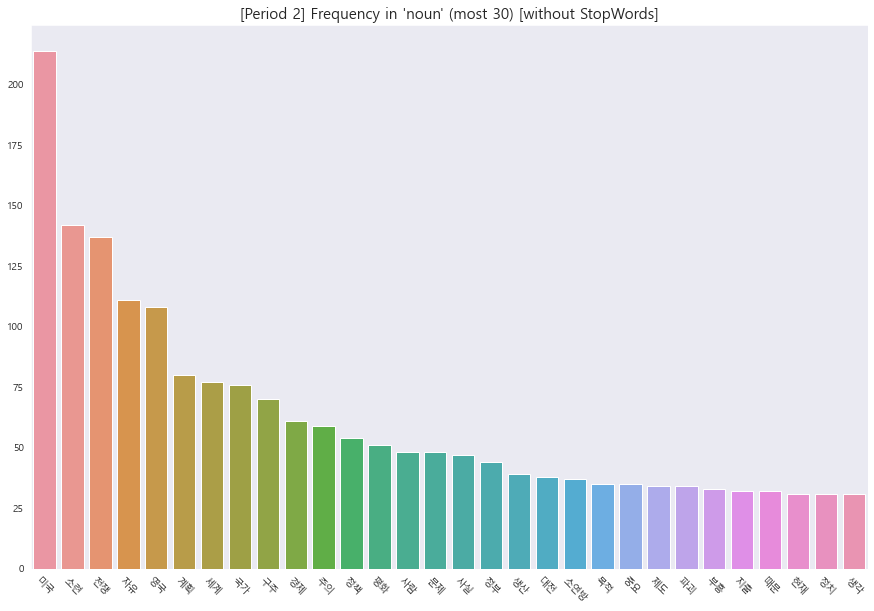

In [35]:
plotFrequencyBar(wo_classDict_2, filepath=RESULT_2, pos='noun', wo=True, period=2)

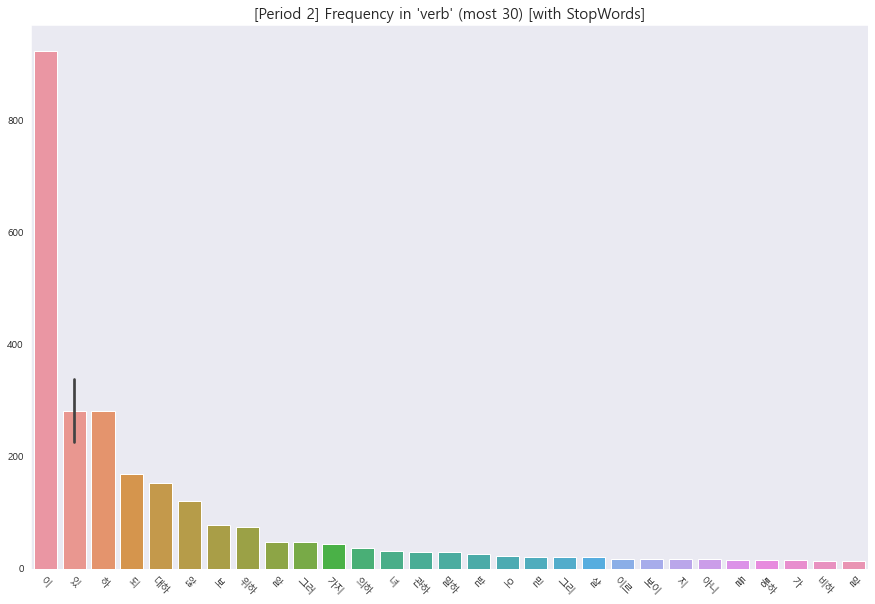

In [36]:
plotFrequencyBar(classDict_2, filepath=RESULT_2, pos='verb', wo=False, period=2)

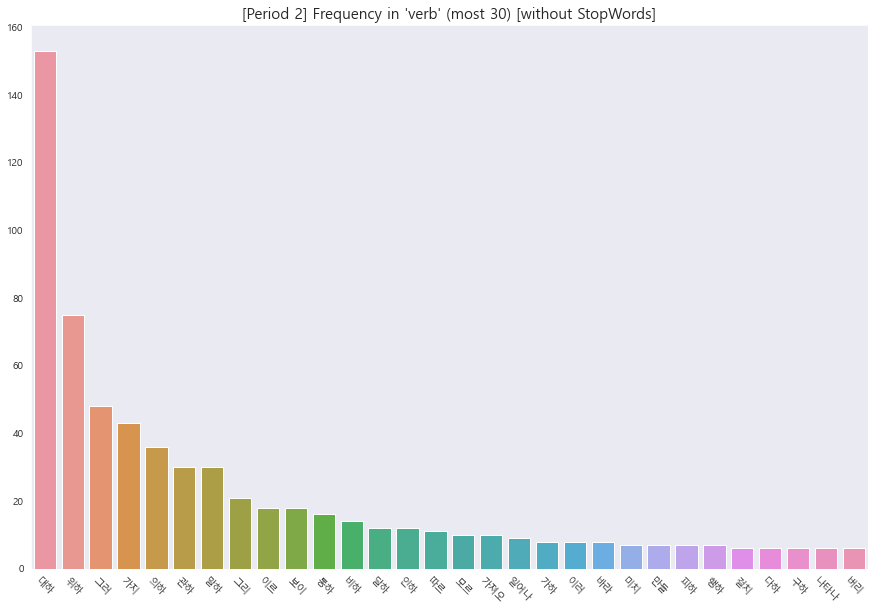

In [37]:
plotFrequencyBar(wo_classDict_2, filepath=RESULT_2, pos='verb', wo=True, period=2)

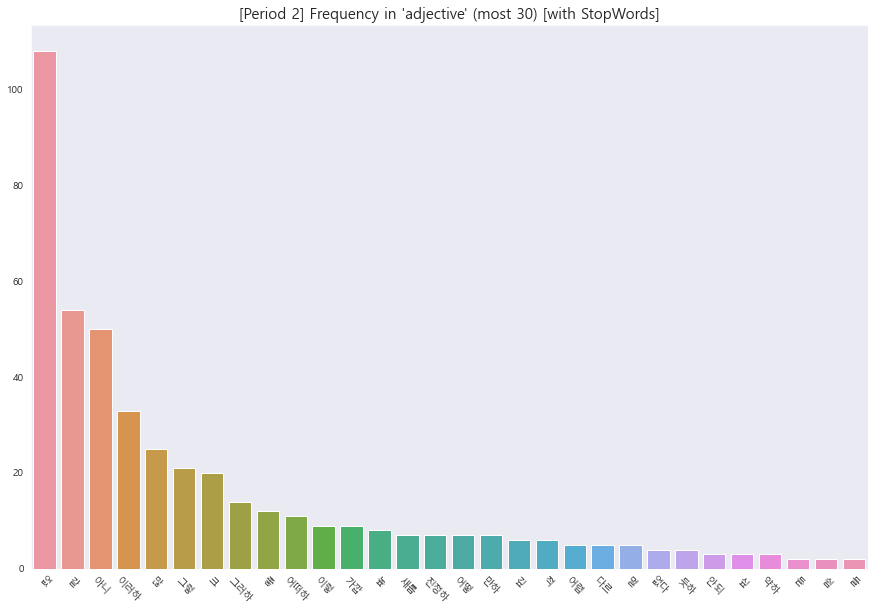

In [38]:
plotFrequencyBar(classDict_2, filepath=RESULT_2, pos='adjective', wo=False, period=2)

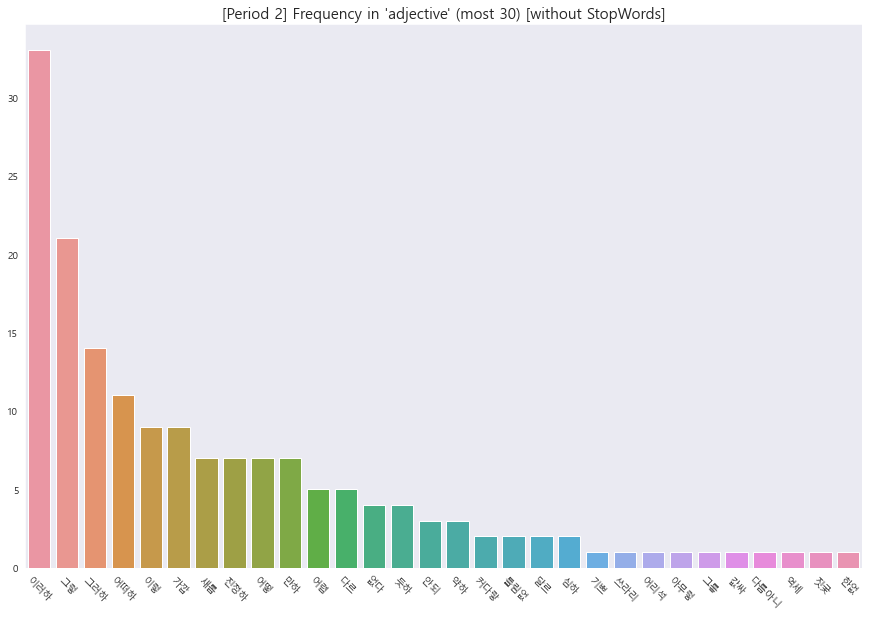

In [39]:
plotFrequencyBar(wo_classDict_2, filepath=RESULT_2, pos='adjective', wo=True, period=2)

#### Period 3

In [40]:
countDict_3, classDict_3 = calcTags(tagged_3, tagList)
wo_countDict_3, wo_classDict_3 = calcTags(wo_stopword_3, tagList)

  0%|          | 0/58736 [00:00<?, ?it/s]

  0%|          | 0/19034 [00:00<?, ?it/s]

In [41]:
showCountNRate(countDict_3, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 58736개
[noun] 토큰 수 : 20275개 | 비율 : 34.52%
[pronoun] 토큰 수 : 1010개 | 비율 : 1.72%
[verb] 토큰 수 : 6339개 | 비율 : 10.79%
[adjective] 토큰 수 : 943개 | 비율 : 1.61%
[adverb] 토큰 수 : 1531개 | 비율 : 2.61%
[prepnconj] 토큰 수 : 161개 | 비율 : 0.27%
[determiner] 토큰 수 : 849개 | 비율 : 1.45%
[interjection] 토큰 수 : 6개 | 비율 : 0.01%
[number] 토큰 수 : 138개 | 비율 : 0.23%
[foreignW] 토큰 수 : 43개 | 비율 : 0.07%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 11720개 | 비율 : 19.95%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 15619개 | 비율 : 26.59%
-------------------------


In [42]:
showCountNRate(wo_countDict_3, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 19034개
[noun] 토큰 수 : 15541개 | 비율 : 81.65%
[pronoun] 토큰 수 : 172개 | 비율 : 0.9%
[verb] 토큰 수 : 1867개 | 비율 : 9.81%
[adjective] 토큰 수 : 393개 | 비율 : 2.06%
[adverb] 토큰 수 : 868개 | 비율 : 4.56%
[prepnconj] 토큰 수 : 0개 | 비율 : 0.0%
[determiner] 토큰 수 : 95개 | 비율 : 0.5%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 31개 | 비율 : 0.16%
[foreignW] 토큰 수 : 0개 | 비율 : 0.0%
[modal] 토큰 수 : 0개 | 비율 : 0.0%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiceS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [43]:
tag2csv(countDict_3, classDict_3, tagList, RESULT_3 + "tag-withstopword")
tag2csv(wo_countDict_3, wo_classDict_3, tagList, RESULT_3 + "tag-withoutstopword")

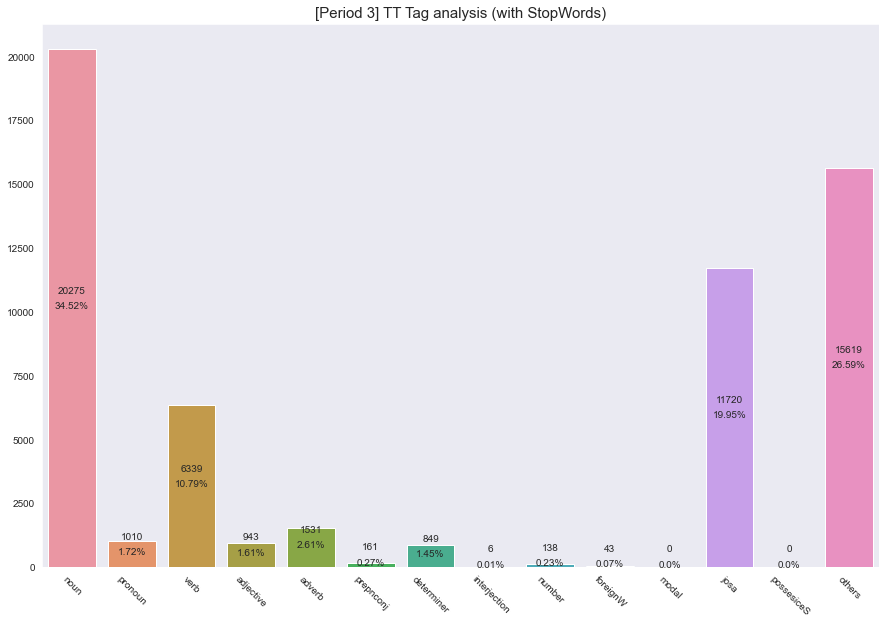

In [44]:
data, labels = DataNLabel(countDict_3)

plotBar(data, labels, "[Period 3] TT Tag analysis (with StopWords)", RESULT_3)

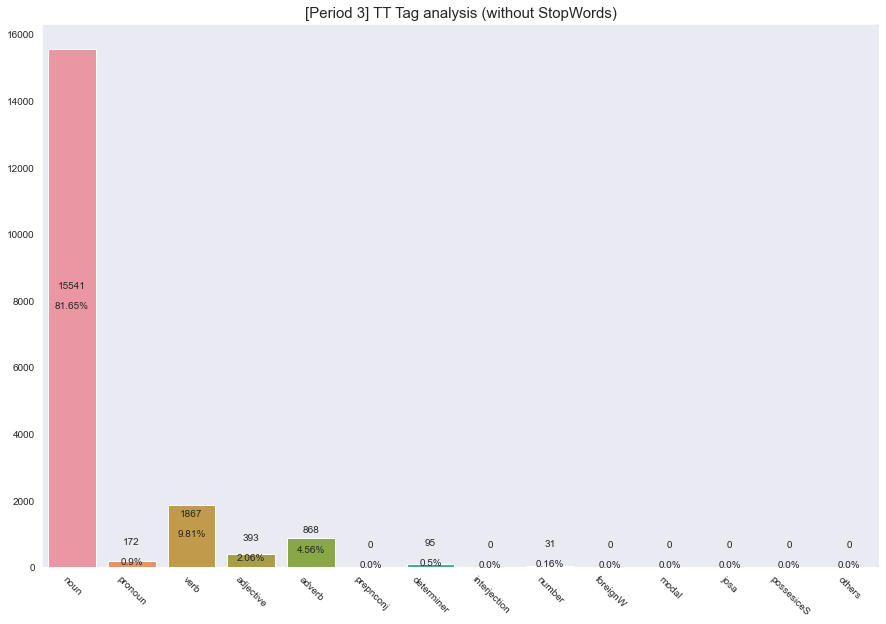

In [45]:
data, labels = DataNLabel(wo_countDict_3)

plotBar(data, labels, "[Period 3] TT Tag analysis (without StopWords)", RESULT_3)

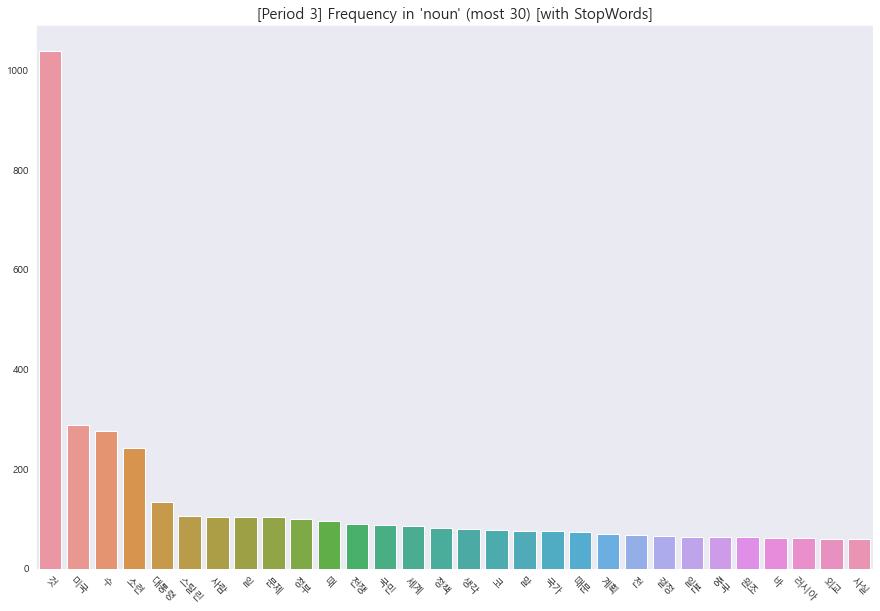

In [46]:
plotFrequencyBar(classDict_3, filepath=RESULT_3, pos='noun', wo=False, period=3)

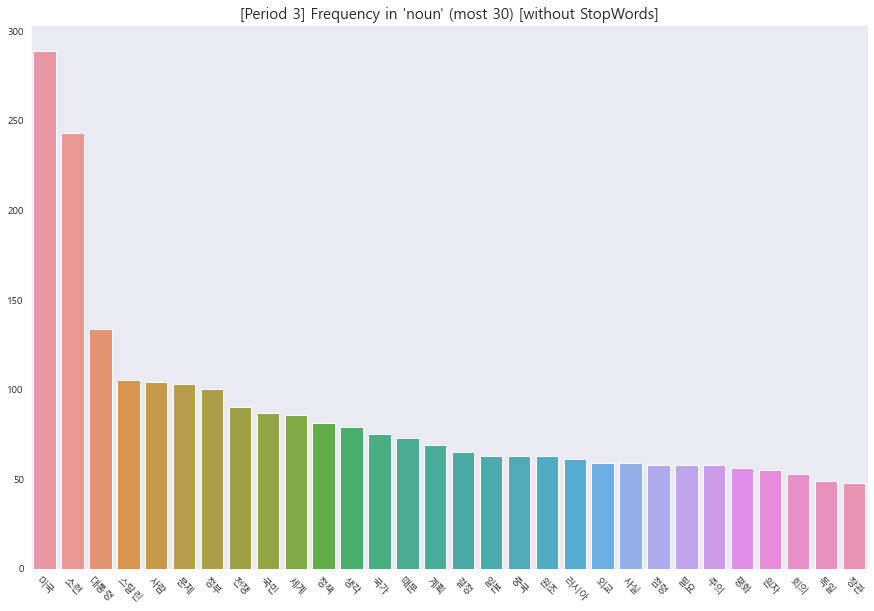

In [47]:
plotFrequencyBar(wo_classDict_3, filepath=RESULT_3, pos='noun', wo=True, period=3)

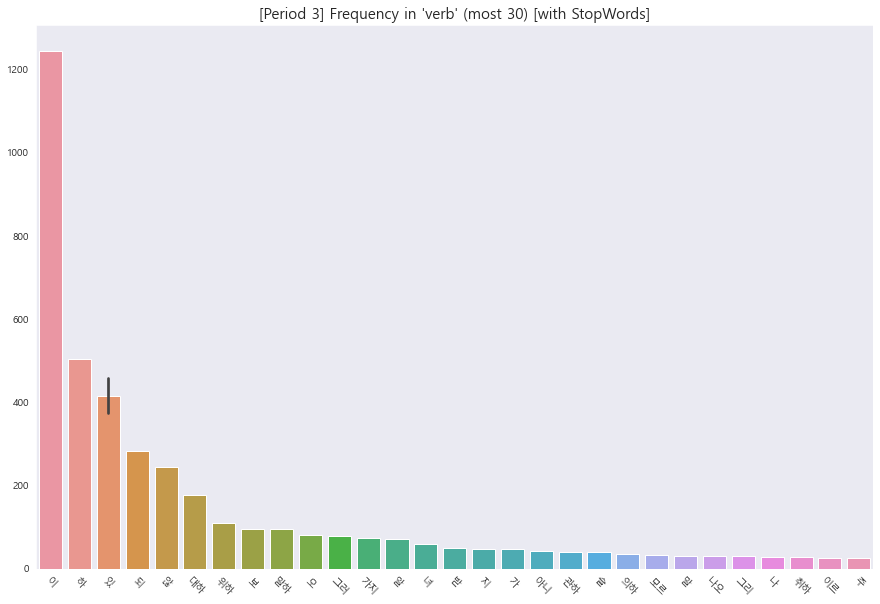

In [48]:
plotFrequencyBar(classDict_3, filepath=RESULT_3, pos='verb', wo=False, period=3)

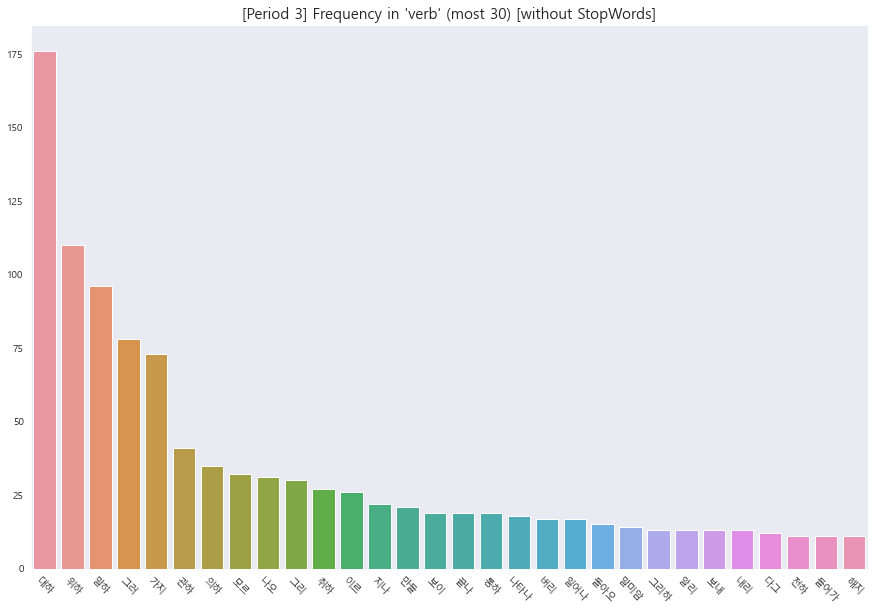

In [49]:
plotFrequencyBar(wo_classDict_3, filepath=RESULT_3, pos='verb', wo=True, period=3)

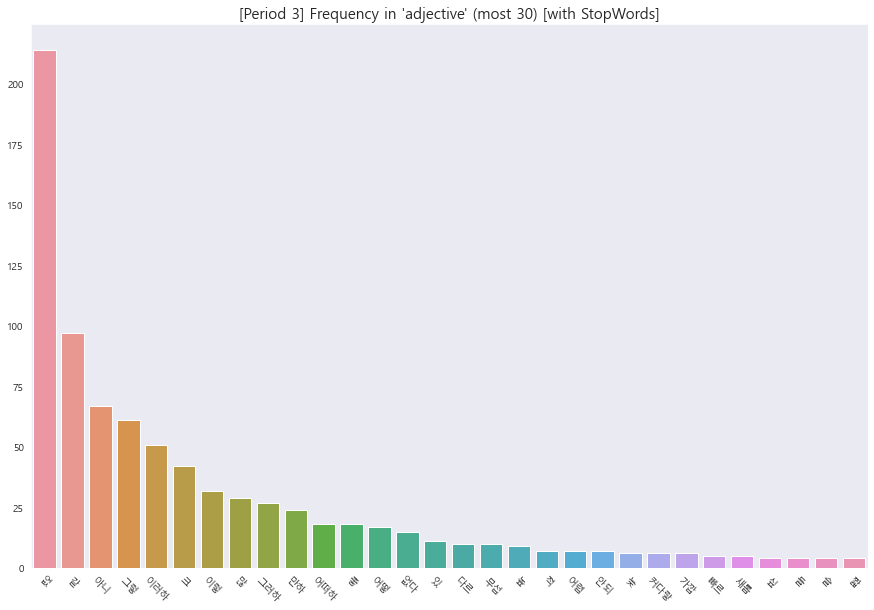

In [50]:
plotFrequencyBar(classDict_3, filepath=RESULT_3, pos='adjective', wo=False, period=3)

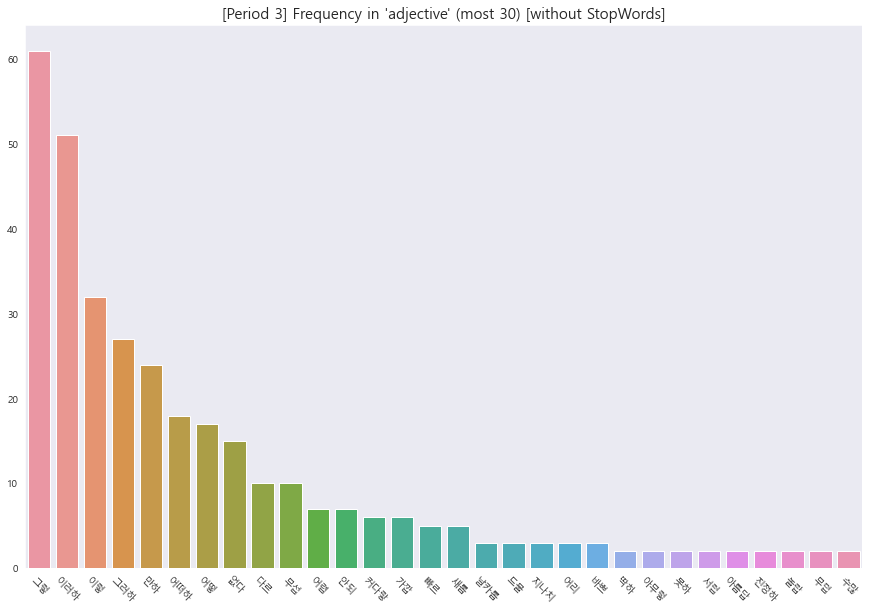

In [51]:
plotFrequencyBar(wo_classDict_3, filepath=RESULT_3, pos='adjective', wo=True, period=3)

### 4-2. Topic Modeling (LDA)

#### Hyper-parameter 정의

- 각 시기 당 article의 수가 10개 였기 때문에 k=10으로 설정하고 모델링하였습니다.
- 적절한 k 값은 실험적으로 찾아보겠습니다.

In [52]:
NUM_TOPICS = 10
NUM_TOPIC_WORDS = 30

#### Period 1

In [53]:
Corp, Dict = buildDTM(tokenized_1)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.000621  0.000927       1        1  25.047651
2      0.008488  0.001169       2        1  22.170523
8      0.002246  0.006940       3        1  19.739090
3      0.008062 -0.005573       4        1  18.533378
5     -0.000397  0.000333       5        1   7.921683
9     -0.005508  0.001658       6        1   3.969012
4     -0.004659 -0.008038       7        1   2.386694
1     -0.004200 -0.002993       8        1   0.193851
7     -0.004344  0.004920       9        1   0.033777
0      0.000932  0.000659      10        1   0.004341, topic_info=     Term        Freq       Total Category  logprob  loglift
703    소련  362.000000  362.000000  Default  30.0000  30.0000
442    미국  216.000000  216.000000  Default  29.0000  29.0000
592    사람  204.000000  204.000000  Default  28.0000  28.0000
1128   정부  116.000000  116.000000  Default  27.0000  27.0000
1100   전쟁  113.000000  113.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
119    공업    0.002076   57.723318  Topic10  -6.1805  -0.1884
385   마니아    0.002341   73.103277  Topic10  -6.0604  -0.3045
912    요구    0.001899   49.613222  Topic10  -6.2696  -0.1261
338    도시    0.001911   50.610236  Topic10  -6.2632  -0.1396
271   노동자    0.001956   58.391049  Topic10  -6.2399  -0.2593

[827 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3025      1  0.144781   가구
3025      2  0.289561   가구
3025      3  0.144781   가구
3025      4  0.289561   가구
3409      1  0.356295   가량
...     ...       ...  ...
1496      3  0.241776  히틀러
1496      4  0.241776  히틀러
1496      5  0.069079  히틀러
1496      6  0.034539  히틀러
1496      7  0.034539  히틀러

[1721 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 9, 4, 6, 10, 5, 2, 8, 1])

#### Period 2

In [54]:
Corp, Dict = buildDTM(tokenized_2)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)

data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.017872  0.007755       1        1  39.446660
5      0.024525  0.000785       2        1  16.736958
1     -0.012259 -0.014023       3        1  10.757447
9      0.006036 -0.002946       4        1  10.586623
7     -0.002087  0.009051       5        1   6.905692
2      0.006863 -0.001868       6        1   6.586096
0     -0.004037  0.001625       7        1   6.395743
3      0.004826  0.011005       8        1   2.565740
6      0.002220 -0.013718       9        1   0.009520
8     -0.008217  0.002333      10        1   0.009520, topic_info=    Term        Freq       Total Category  logprob  loglift
225   미국  190.000000  190.000000  Default  30.0000  30.0000
506   자유   85.000000   85.000000  Default  29.0000  29.0000
532   전쟁  123.000000  123.000000  Default  28.0000  28.0000
350   소련  124.000000  124.000000  Default  27.0000  27.0000
343   세계   62.000000   62.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
548   정부    0.002659   35.925859  Topic10  -5.9302  -0.2519
299   사실    0.002666   41.042705  Topic10  -5.9275  -0.3823
966   제도    0.002427   30.348902  Topic10  -6.0213  -0.1743
55    계획    0.002692   65.879560  Topic10  -5.9177  -0.8457
685   평화    0.002332   36.915639  Topic10  -6.0615  -0.4103

[772 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.453093   가능
0         2  0.151031   가능
0         3  0.100687   가능
0         4  0.100687   가능
0         5  0.050344   가능
...     ...       ...  ...
749       3  0.100250   희랍
749       4  0.150375   희랍
749       5  0.100250   희랍
749       6  0.100250   희랍
749       7  0.050125   희랍

[1379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 10, 8, 3, 1, 4, 7, 9])

#### Period 3

In [55]:
Corp, Dict = buildDTM(tokenized_3)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)

data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.007017  0.010427       1        1  28.082564
8      0.009334 -0.006302       2        1  16.724225
2     -0.001385  0.002175       3        1  13.624248
9      0.008990  0.005218       4        1  12.338890
0      0.011251  0.002755       5        1  10.886059
7     -0.007614 -0.009434       6        1   9.250742
4      0.009855 -0.005287       7        1   9.071919
6     -0.004219 -0.000463       8        1   0.007172
5     -0.019246 -0.001833       9        1   0.007092
3      0.000052  0.002744      10        1   0.007090, topic_info=     Term        Freq       Total Category  logprob  loglift
217    미국  239.000000  239.000000  Default  30.0000  30.0000
312    소련  216.000000  216.000000  Default  29.0000  29.0000
324   스탈린   82.000000   82.000000  Default  28.0000  28.0000
272    사람   82.000000   82.000000  Default  27.0000  27.0000
152   대통령  115.000000  115.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
770    국가    0.002904   59.872820  Topic10  -5.9388  -0.3798
28     결정    0.002829   57.493858  Topic10  -5.9650  -0.3654
681    회의    0.002497   44.876857  Topic10  -6.0897  -0.2424
443    일본    0.002604   56.279887  Topic10  -6.0476  -0.4267
2700   원자    0.002531   50.144808  Topic10  -6.0762  -0.3399

[782 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.551250   가가
0         2  0.183750   가가
0         3  0.183750   가가
0         5  0.183750   가가
5         1  0.248027   가지
...     ...       ...  ...
681       3  0.155982   회의
681       4  0.155982   회의
681       5  0.133699   회의
681       6  0.089133   회의
681       7  0.066850   회의

[1752 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 3, 10, 1, 8, 5, 7, 6, 4])

### 4-3. WordCloud

#### Period 1

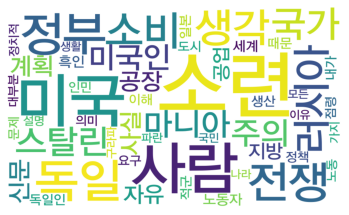

In [56]:
plotWordCloud(tokenized_1, RESULT_1 + 'WordCloud')

#### Period 2

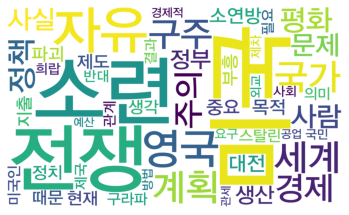

In [57]:
plotWordCloud(tokenized_2, RESULT_2 + 'WordCloud')

#### Period 3

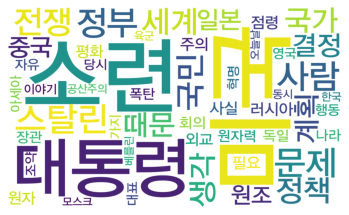

In [58]:
plotWordCloud(tokenized_3, RESULT_3 + 'WordCloud')

### 4-4. Network web analysis

In [ ]:
# result = (list(apriori(tokenized_1, min_support=0.01)))

In [ ]:
# df = pd.DataFrame(result)
# df['length'] = df['items'].apply(lambda x: len(x))
# df = df[(df['length'] == 2) & \
#     (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
# df.head(10)